# Temperature forecasting example

## Listing 10.1
Inspecting the data of the Jena weather dataset

In [56]:
import os
fname = os.path.join("jena_climate_2009_2016.csv")
with open(fname) as f:
    data = f.read()

lines = data.split("\n")
header = lines[0].split(",")
lines = lines[1:]
print(header)
print(len(lines))

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420451


## Listing 10.2
Parsing the data

In [57]:
import numpy as np
temperature = np.zeros((len(lines),))
raw_data = np.zeros((len(lines), len(header) - 1))

for i, line in enumerate(lines):
    values = [float(x) for x in line.split(",")[1:]]
    temperature[i] = values[1]
    raw_data[i, :] = values[:]

print(raw_data)
print(raw_data.shape)
print(temperature.mean())
print(raw_data[:,1].mean())

print("raw_data num_samples 210225")
print(raw_data[:210225,1].mean())

[[ 9.9652e+02 -8.0200e+00  2.6540e+02 ...  1.0300e+00  1.7500e+00
   1.5230e+02]
 [ 9.9657e+02 -8.4100e+00  2.6501e+02 ...  7.2000e-01  1.5000e+00
   1.3610e+02]
 [ 9.9653e+02 -8.5100e+00  2.6491e+02 ...  1.9000e-01  6.3000e-01
   1.7160e+02]
 ...
 [ 9.9982e+02 -3.1600e+00  2.7001e+02 ...  1.0800e+00  2.0000e+00
   2.1520e+02]
 [ 9.9981e+02 -4.2300e+00  2.6894e+02 ...  1.4900e+00  2.1600e+00
   2.2580e+02]
 [ 9.9982e+02 -4.8200e+00  2.6836e+02 ...  1.2300e+00  1.9600e+00
   1.8490e+02]]
(420451, 14)
9.44856687223957
9.44856687223957
raw_data num_samples 210225
8.825903294089667


## Listing 10.3
Plotting the temperature timeseries

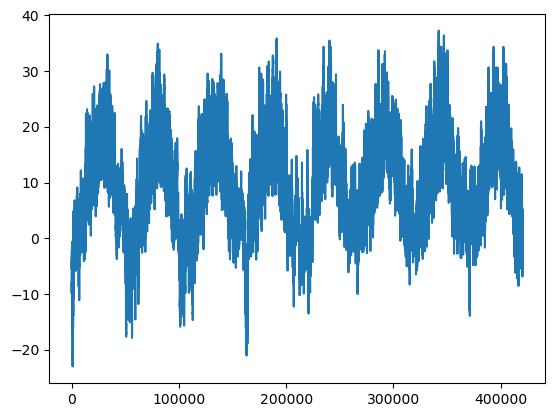

In [58]:
from matplotlib import pyplot as plt
plt.plot(range(len(temperature)), temperature)

## Listing 10.4
Plotting the first 10 days of the temperature timeseries

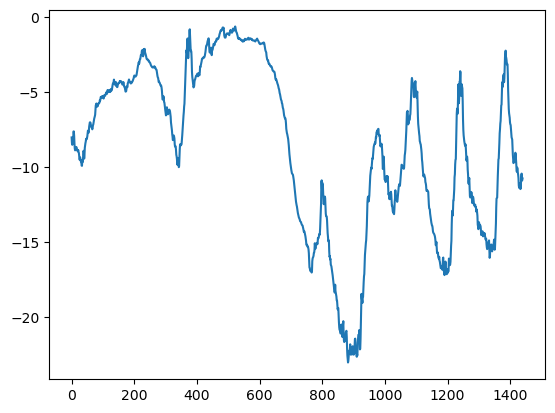

In [4]:
plt.plot(range(1440), temperature[:1440])

## Prepare the data

In [59]:
num_train_samples = int(0.5 * len(raw_data))
num_val_samples = int(0.25 * len(raw_data))
num_test_samples = len(raw_data) - num_train_samples - num_val_samples

print("num_train_samples:", num_train_samples)
print("num_val_samples:", num_val_samples)
print("num_test_samples:", num_test_samples)

num_train_samples: 210225
num_val_samples: 105112
num_test_samples: 105114


## Listing 10.6
Normalizing the data

In [54]:
# Mean computation

a = np.array([[1, 2], [3, 4]])
print(a)
np.mean(a)
2.5

print(np.mean(a, axis=0) )
#array([2., 3.])

print(np.mean(a, axis=1) )
#array([1.5, 3.5])

[[1 2]
 [3 4]]
[2. 3.]
[1.5 3.5]


In [60]:
# save raw_data
prev_raw_data=raw_data

mean = raw_data[:num_train_samples].mean(axis=0)

raw_data -= mean
std = raw_data[:num_train_samples].std(axis=0)

raw_data /= std

print("mean")
print(mean)

print("std")
print(std)


mean
[ 988.74929466    8.82590329  282.9050718     4.31331863   75.87275476
   13.14569946    9.19414209    3.95148184    5.81050741    9.30208943
 1218.45204015    2.14977462    3.56048029  176.4405232 ]
std
[ 8.50510865  8.77098361  8.86560463  7.08011256 16.62877917  7.6012955
  4.14689697  4.76961017  2.63277288  4.1996886  42.0392747   1.53358803
  2.32305586 85.85032063]


## Understanding the timeseries_dataset_from_array

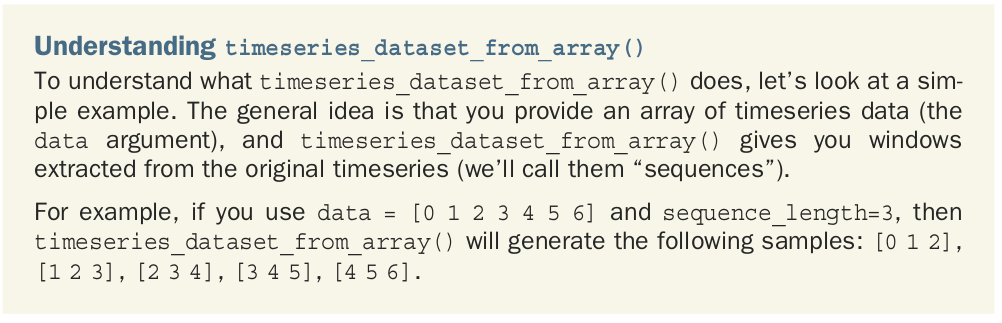

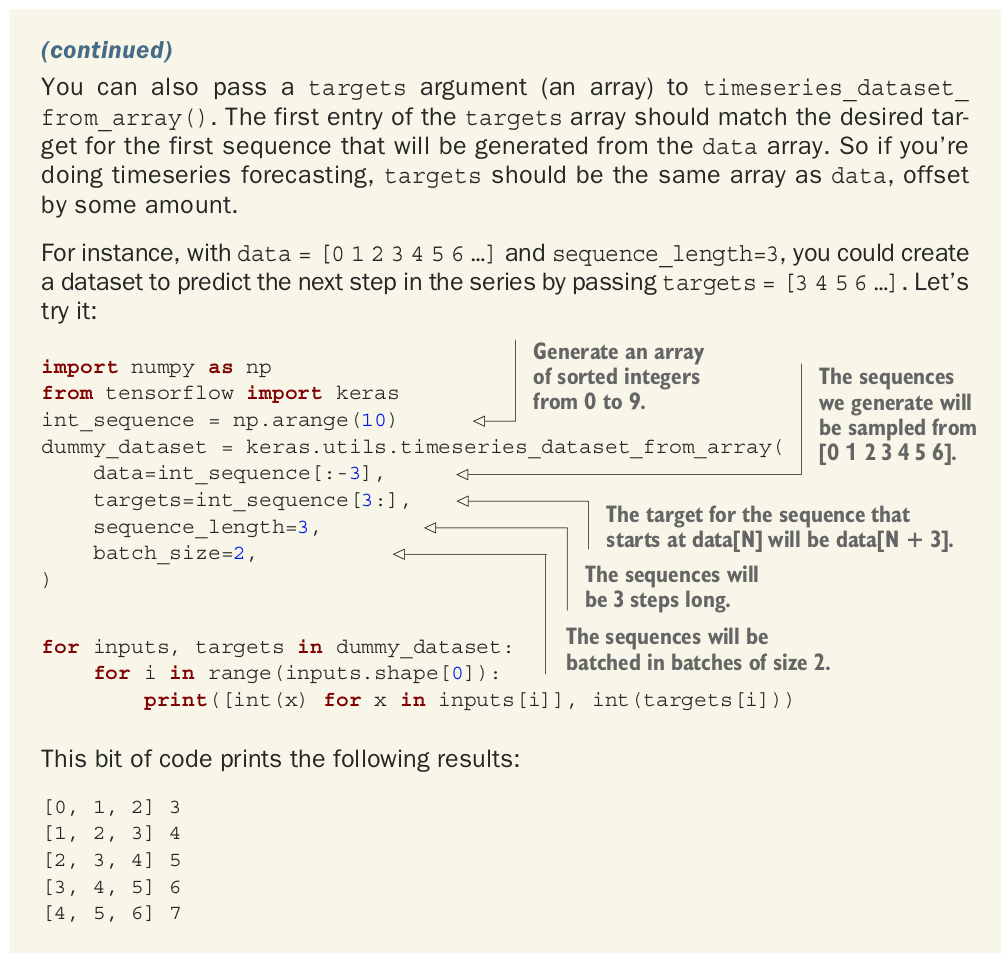

## Listing 10.7
Instantiating datasets for training, validation, and testing

We’ll use the following parameter values:

 **sampling_rate = 6**
 
 Observations will be sampled at one data point per hour: we will only keep one data point out of 6.

 **sequence_length = 120—Observations will go back 5 days (120 hours)**
 
 **delay = sampling_rate * (sequence_length + 24 - 1)**
 
 The target for a sequence will be the temperature 24 hours after the end of the sequence.

In [104]:
# raw data at delay 
print(raw_data[delay-2:delay+1]*std + mean)
print("")
# raw data at -delay
print(raw_data[-(delay+1):-(delay-1)]*std + mean)

[[ 9.96570e+02 -8.41000e+00  2.65010e+02 -9.28000e+00  9.34000e+01
   3.23000e+00  3.02000e+00  2.10000e-01  1.89000e+00  3.03000e+00
   1.30980e+03  7.20000e-01  1.50000e+00  1.36100e+02]
 [ 9.96530e+02 -8.51000e+00  2.64910e+02 -9.31000e+00  9.39000e+01
   3.21000e+00  3.01000e+00  2.00000e-01  1.88000e+00  3.02000e+00
   1.31024e+03  1.90000e-01  6.30000e-01  1.71600e+02]
 [ 9.96510e+02 -8.31000e+00  2.65120e+02 -9.07000e+00  9.42000e+01
   3.26000e+00  3.07000e+00  1.90000e-01  1.92000e+00  3.08000e+00
   1.30919e+03  3.40000e-01  5.00000e-01  1.98000e+02]]

[[ 9.99930e+02 -3.35000e+00  2.69810e+02 -8.06000e+00  6.97100e+01
   4.77000e+00  3.32000e+00  1.44000e+00  2.07000e+00  3.32000e+00
   1.28944e+03  1.14000e+00  1.92000e+00  2.34300e+02]
 [ 9.99820e+02 -3.16000e+00  2.70010e+02 -8.21000e+00  6.79100e+01
   4.84000e+00  3.28000e+00  1.55000e+00  2.05000e+00  3.28000e+00
   1.28839e+03  1.08000e+00  2.00000e+00  2.15200e+02]]


In [106]:
print(temperature[delay-2:delay+1])
print(temperature[-(delay+1):-(delay-1)])

[-8.41 -8.51 -8.31]
[-3.35 -3.16]


In [103]:
a=[0,1,2,3,4,5]
delay=3
print(a[:-delay] )
print(a[delay:] )
print(a[-(delay+1):-(delay-1)])

[0, 1, 2]
[3, 4, 5]
[2, 3]


In [61]:
import keras

sampling_rate = 6
sequence_length = 120
delay = sampling_rate * (sequence_length + 24 - 1)
batch_size = 256

train_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    #shuffle=True,
    batch_size=batch_size,
    start_index=0,
    end_index=num_train_samples)

val_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples,
    end_index=num_train_samples + num_val_samples)

test_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples + num_val_samples)

## Listing 10.8
Inspecting the output of one of our datasets

In [45]:
print(delay)
delay-3*256

858


90

In [62]:
for samples, targets in train_dataset:
    print("samples shape:", samples.shape)
    print("targets shape:", targets.shape)
    break

samples shape: (256, 120, 14)
targets shape: (256,)


## Listing 10.9
Computing the common-sense baseline MAE

In [63]:
print(mean[1])
print(std[1])

8.825903294089702
8.770983608349871


In [67]:
for samples, targets in train_dataset:
    print("samples shape:", samples.shape)
    print("targets shape:", targets.shape)
    print("samples")
    print(samples[:5,-1,1])
    print(samples[:5,-1,1]*std[1])
    print(samples[:5,-1,1]*std[1]+mean[1])
    print("targets")
    print(targets[:5])
    break

samples shape: (256, 120, 14)
targets shape: (256,)
samples
tf.Tensor([-2.36984861 -2.39265107 -2.40861279 -2.42343439 -2.43597574], shape=(5,), dtype=float64)
tf.Tensor([-20.78590329 -20.98590329 -21.12590329 -21.25590329 -21.36590329], shape=(5,), dtype=float64)
tf.Tensor([-11.96 -12.16 -12.3  -12.43 -12.54], shape=(5,), dtype=float64)
targets
tf.Tensor([-21.08 -21.07 -20.51 -20.48 -20.75], shape=(5,), dtype=float64)


In [107]:
def evaluate_naive_method(dataset):
    total_abs_err = 0.
    samples_seen = 0
    for samples, targets in dataset:
        preds = samples[:, -1, 1] * std[1] + mean[1]
        total_abs_err += np.sum(np.abs(preds - targets))
        samples_seen += samples.shape[0]
    return total_abs_err / samples_seen

print(f"Validation MAE: {evaluate_naive_method(val_dataset):.2f}")
print(f"Test MAE: {evaluate_naive_method(test_dataset):.2f}")

Validation MAE: 2.44
Test MAE: 2.62


## Listing 10.10 Training and evaluating a densely connected model

In [108]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.Flatten()(inputs)
x = layers.Dense(16, activation="relu")(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [keras.callbacks.ModelCheckpoint("jena_dense.keras", save_best_only=True)]

model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

history = model.fit(train_dataset, epochs=10, validation_data=val_dataset, callbacks=callbacks)

model = keras.models.load_model("jena_dense.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10


2024-01-14 20:58:18.879312: I external/local_xla/xla/service/service.cc:168] XLA service 0x564c9ad6b5f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-01-14 20:58:18.879351: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 2060, Compute Capability 7.5
2024-01-14 20:58:18.890215: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-01-14 20:58:18.919859: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1705283898.964853   14110 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


819/819 [==============================] - 11s 13ms/step - loss: 19.7488 - mae: 3.4518 - val_loss: 103.7322 - val_mae: 8.1384
Epoch 2/10
819/819 [==============================] - 10s 13ms/step - loss: 14.1631 - mae: 2.8876 - val_loss: 83.0704 - val_mae: 7.2106
Epoch 3/10
819/819 [==============================] - 10s 13ms/step - loss: 13.2788 - mae: 2.7965 - val_loss: 79.5825 - val_mae: 6.9898
Epoch 4/10
819/819 [==============================] - 11s 13ms/step - loss: 12.7462 - mae: 2.7457 - val_loss: 79.2634 - val_mae: 6.7346
Epoch 5/10
819/819 [==============================] - 11s 13ms/step - loss: 12.4080 - mae: 2.7242 - val_loss: 86.3702 - val_mae: 6.9564
Epoch 6/10
819/819 [==============================] - 11s 13ms/step - loss: 11.9067 - mae: 2.6730 - val_loss: 89.8997 - val_mae: 7.0251
Epoch 7/10
819/819 [==============================] - 10s 13ms/step - loss: 11.5783 - mae: 2.6394 - val_loss: 89.5381 - val_mae: 6.9416
Epoch 8/10
819/819 [==============================] - 10s 

## Listing 10.11 
Plotting results

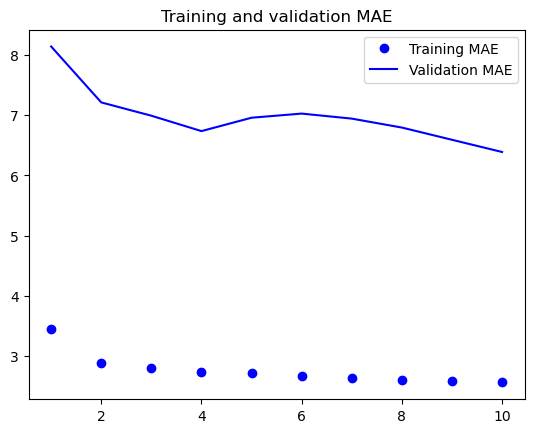

In [110]:
import matplotlib.pyplot as plt
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

## 10.2.4 Let’s try a 1D convolutional model

In [111]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.Conv1D(8, 24, activation="relu")(inputs)
x = layers.MaxPooling1D(2)(x)
x = layers.Conv1D(8, 12, activation="relu")(x)
x = layers.MaxPooling1D(2)(x)
x = layers.Conv1D(8, 6, activation="relu")(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [keras.callbacks.ModelCheckpoint("jena_conv.keras",save_best_only=True)]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,epochs=10,validation_data=val_dataset,callbacks=callbacks)
model = keras.models.load_model("jena_conv.keras")

print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10


2024-01-14 21:01:57.913163: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


  6/819 [..............................] - ETA: 8s - loss: 82.8947 - mae: 7.0772     

2024-01-14 21:01:58.742295: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 731.76MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-01-14 21:01:58.755139: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 731.76MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-01-14 21:01:58.771346: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 731.76MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-01-14 21:01:58.783914: W external/local_tsl/tsl/framewor

819/819 [==============================] - 13s 14ms/step - loss: 29.1077 - mae: 4.2472 - val_loss: 66.1226 - val_mae: 6.5565
Epoch 2/10
819/819 [==============================] - 11s 13ms/step - loss: 21.8774 - mae: 3.6984 - val_loss: 103.1973 - val_mae: 8.3546
Epoch 3/10
819/819 [==============================] - 11s 13ms/step - loss: 19.4200 - mae: 3.4738 - val_loss: 111.0422 - val_mae: 8.7431
Epoch 4/10
819/819 [==============================] - 11s 13ms/step - loss: 18.2463 - mae: 3.3489 - val_loss: 102.5914 - val_mae: 8.5056
Epoch 5/10
819/819 [==============================] - 11s 13ms/step - loss: 17.6713 - mae: 3.2816 - val_loss: 109.2551 - val_mae: 8.7253
Epoch 6/10
819/819 [==============================] - 11s 13ms/step - loss: 17.2520 - mae: 3.2443 - val_loss: 110.5784 - val_mae: 8.7624
Epoch 7/10
819/819 [==============================] - 11s 13ms/step - loss: 16.9239 - mae: 3.2136 - val_loss: 111.2593 - val_mae: 8.7842
Epoch 8/10
819/819 [==============================] -

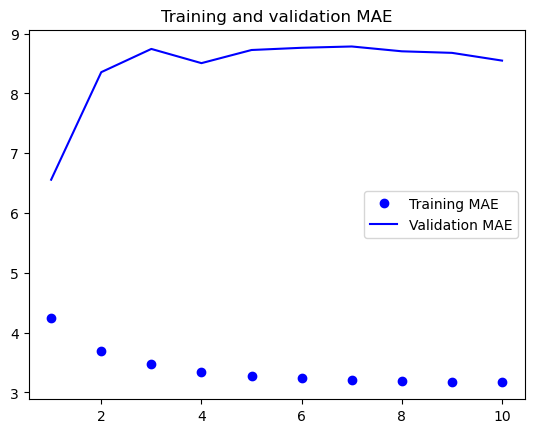

In [112]:
import matplotlib.pyplot as plt
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

## Listing 10.12 
A simple LSTM-based model

In [113]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.LSTM(16)(inputs)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)
callbacks = [ keras.callbacks.ModelCheckpoint("jena_lstm.keras", save_best_only=True)]

model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset, epochs=10, validation_data=val_dataset, callbacks=callbacks)
model = keras.models.load_model("jena_lstm.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10
819/819 [==============================] - 12s 13ms/step - loss: 58.2949 - mae: 5.8783 - val_loss: 29.5344 - val_mae: 4.0639
Epoch 2/10
819/819 [==============================] - 11s 13ms/step - loss: 24.4908 - mae: 3.7078 - val_loss: 17.2792 - val_mae: 3.1237
Epoch 3/10
819/819 [==============================] - 11s 13ms/step - loss: 18.0514 - mae: 3.1898 - val_loss: 13.2917 - val_mae: 2.7878
Epoch 4/10
819/819 [==============================] - 11s 13ms/step - loss: 15.4090 - mae: 2.9692 - val_loss: 11.7531 - val_mae: 2.6544
Epoch 5/10
819/819 [==============================] - 11s 13ms/step - loss: 13.8831 - mae: 2.8398 - val_loss: 10.9938 - val_mae: 2.5813
Epoch 6/10
819/819 [==============================] - 11s 13ms/step - loss: 12.8504 - mae: 2.7528 - val_loss: 10.6550 - val_mae: 2.5492
Epoch 7/10
819/819 [==============================] - 11s 13ms/step - loss: 12.2022 - mae: 2.6995 - val_loss: 10.4776 - val_mae: 2.5293
Epoch 8/10
819/819 [============================

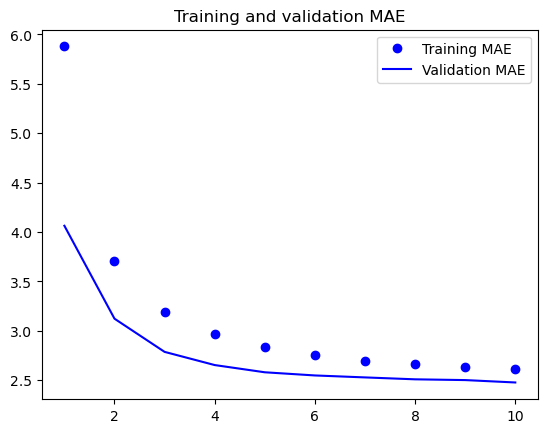

In [114]:
import matplotlib.pyplot as plt
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

## Show predictions

In [122]:
# Make test set not shuffled
test_dataset_ordered = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    #shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples + num_val_samples)

In [123]:
# Predict
pred = model.predict(test_dataset_ordered)

408/408 [==============================] - 4s 9ms/step


In [125]:
print(pred)
print(pred.shape)

[[ 4.7520194 ]
 [ 4.6363993 ]
 [ 4.5033035 ]
 ...
 [-0.03878039]
 [ 0.07837588]
 [-0.09513384]]
(104397, 1)


In [133]:
# plot actual and predicted
actual = temperature[num_train_samples + num_val_samples + delay:]
print(actual.shape)

(105111,)


## Not synchronized. How to synchronize

/tmp/ipykernel_12346/935793061.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(index, actual[:2000], "b", color="red", label="Actual")


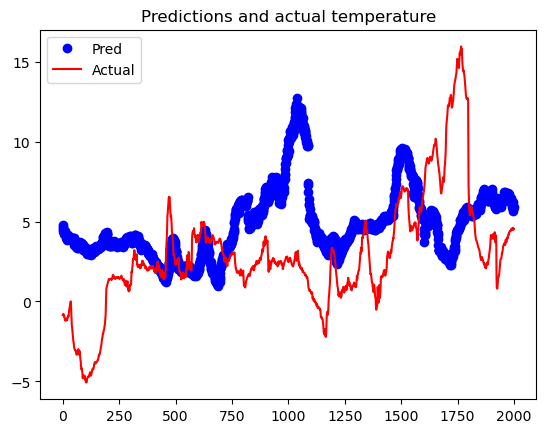

In [134]:
index = range(2000)
plt.figure()
plt.plot(index, pred[:2000], "bo", label="Pred")
plt.plot(index, actual[:2000], "b", color="red", label="Actual")
plt.title("Predictions and actual temperature")
plt.legend()
plt.show()

## Understanding RNN

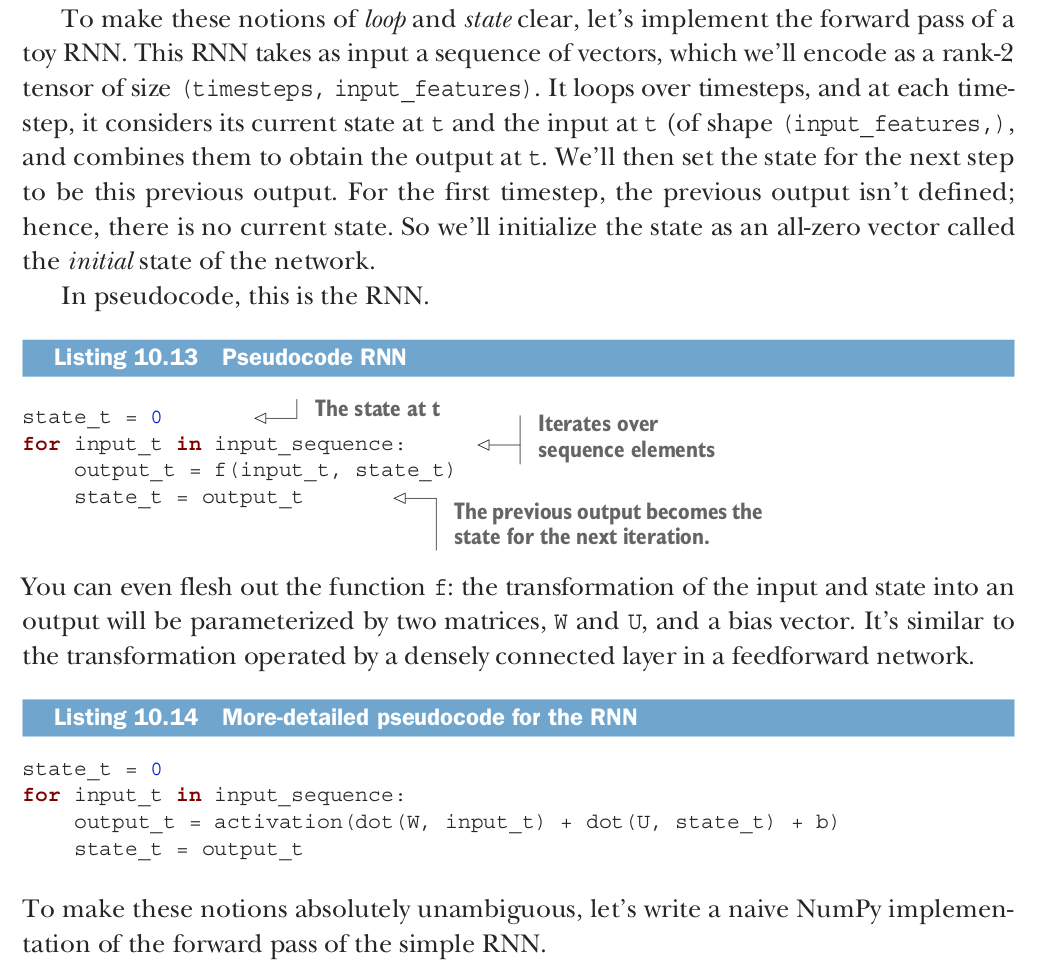

## Listing 10.15 
NumPy implementation of a simple RNN

In [20]:
import numpy as np
timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps, input_features))
state_t = np.zeros((output_features,))

# weight matrices 
W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))
successive_outputs = []

for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    successive_outputs.append(output_t)
    state_t = output_t

final_output_sequence = np.stack(successive_outputs, axis=0)


In [24]:
print(inputs.shape)
print(final_output_sequence.shape)
print(output_t.shape)

(100, 32)
(100, 64)
(64,)


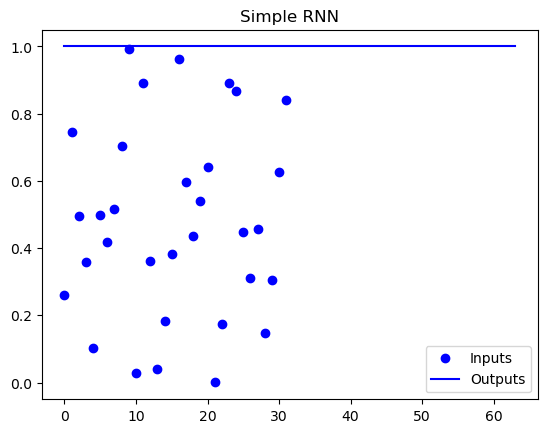

In [26]:
plt.figure()
plt.plot(inputs[1,:], "bo", label="Inputs")
plt.plot(final_output_sequence[1,:], "b", label="Outputs")
plt.title("Simple RNN")
plt.legend()
plt.show()

## A simple RNN over time

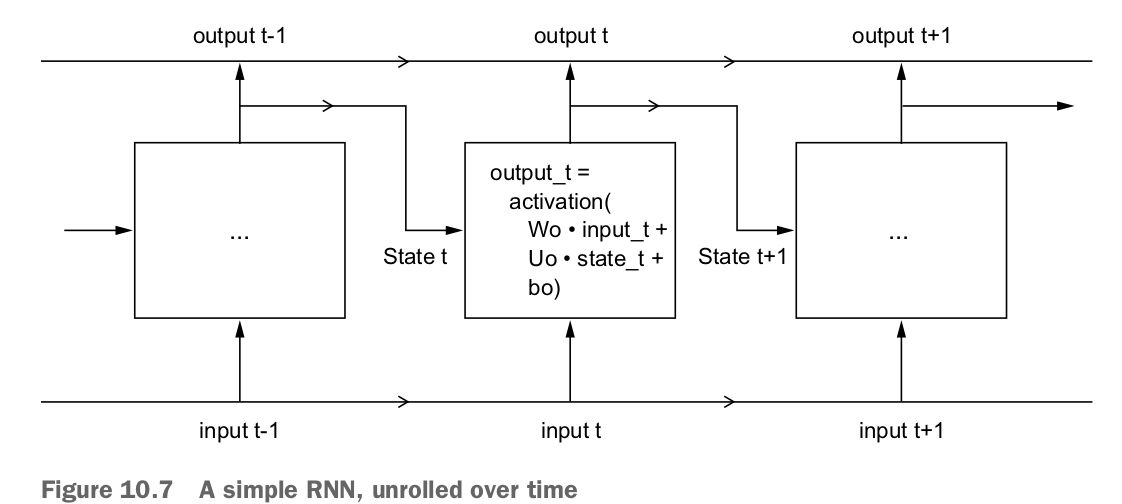

## 10.3.1 A recurrent layer in Keras

The process we just naively implemented in NumPy corresponds to an actual Keras
layer—the SimpleRNN layer.
There is one minor difference: SimpleRNN processes batches of sequences, like all
other Keras layers, not a single sequence as in the NumPy example. This means it takes
inputs of shape (batch_size, timesteps, input_features), rather than (timesteps,
input_features). When specifying the shape argument of the initial Input(), note
that you can set the timesteps entry to None, which enables your network to process
sequences of arbitrary length.

## Listing 10.16 
An RNN layer that can process sequences of any length

In [28]:
num_features = 14
inputs = keras.Input(shape=(None, num_features))
outputs = layers.SimpleRNN(16)(inputs)

All recurrent layers in Keras (SimpleRNN, LSTM, and GRU) can be run in two differ-
ent modes: they can return either full sequences of successive outputs for each time-
step (a rank-3 tensor of shape (batch_size, timesteps, output_features)) or
return only the last output for each input sequence (a rank-2 tensor of shape (batch_
size, output_features)). These two modes are controlled by the return_sequences
constructor argument. Let’s look at an example that uses SimpleRNN and returns only
the output at the last timestep.

## Listing 10.17 
An RNN layer that returns only its last output step

In [29]:
num_features = 14
steps = 120
inputs = keras.Input(shape=(steps, num_features))
outputs = layers.SimpleRNN(16, return_sequences=False)(inputs)
print(outputs.shape)

(None, 16)


## Listing 10.18 
An RNN layer that returns its full output sequence

In [30]:
num_features = 14
steps = 120
inputs = keras.Input(shape=(steps, num_features))
outputs = layers.SimpleRNN(16, return_sequences=True)(inputs)
print(outputs.shape)

(None, 120, 16)


## Listing 10.19 
Stacking RNN layers

In [32]:
inputs = keras.Input(shape=(steps, num_features))
x = layers.SimpleRNN(16, return_sequences=True)(inputs)
x = layers.SimpleRNN(16, return_sequences=True)(x)
outputs = layers.SimpleRNN(16)(x)
print(outputs.shape)

(None, 16)


## Look up page 299 , how LSTM computes

## Using recurrent dropout
## STOP HERE, THE REST TAKES VERY LONG TIME

## Listing 10.22 
Training and evaluating a dropout-regularized LSTM

In [37]:
print(sequence_length)
print(raw_data.shape[-1])

120
14


In [39]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.LSTM(32, recurrent_dropout=0.2 )(inputs)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [ keras.callbacks.ModelCheckpoint("jena_lstm_dropout.keras", save_best_only=True) ]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset, epochs=50, validation_data=val_dataset, callbacks=callbacks)

Epoch 1/50
819/819 [==============================] - 175s 212ms/step - loss: 28.6909 - mae: 3.9474 - val_loss: 9.8658 - val_mae: 2.4323
Epoch 2/50
819/819 [==============================] - 174s 213ms/step - loss: 14.6684 - mae: 2.9720 - val_loss: 9.2947 - val_mae: 2.3755
Epoch 3/50
819/819 [==============================] - 179s 218ms/step - loss: 13.7694 - mae: 2.8720 - val_loss: 9.2828 - val_mae: 2.3713
Epoch 4/50
819/819 [==============================] - 173s 212ms/step - loss: 13.2577 - mae: 2.8164 - val_loss: 9.4571 - val_mae: 2.3936
Epoch 5/50
819/819 [==============================] - 175s 213ms/step - loss: 12.7777 - mae: 2.7677 - val_loss: 9.4288 - val_mae: 2.4027
Epoch 6/50
819/819 [==============================] - 182s 222ms/step - loss: 12.4042 - mae: 2.7248 - val_loss: 9.1597 - val_mae: 2.3627
Epoch 7/50
819/819 [==============================] - 174s 213ms/step - loss: 12.1215 - mae: 2.6916 - val_loss: 9.1334 - val_mae: 2.3563
Epoch 8/50
819/819 [=====================

In [40]:
model = keras.models.load_model("jena_lstm_dropout.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

405/405 [==============================] - 19s 44ms/step - loss: 10.7558 - mae: 2.5886
Test MAE: 2.59


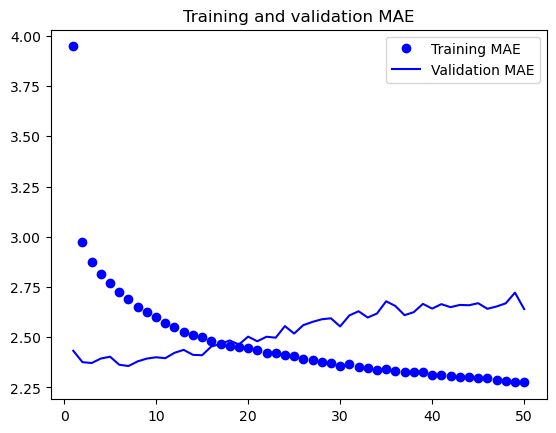

In [41]:
import matplotlib.pyplot as plt
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

## Listing 10.23 
Training and evaluating a dropout-regularized, stacked GRU model

In [42]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.GRU(32, recurrent_dropout=0.5, return_sequences=True)(inputs)
x = layers.GRU(32, recurrent_dropout=0.5)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [ keras.callbacks.ModelCheckpoint("jena_stacked_gru_dropout.keras", save_best_only=True) ]

model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset, epochs=50, validation_data=val_dataset, callbacks=callbacks)
model = keras.models.load_model("jena_stacked_gru_dropout.keras")

print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/50
819/819 [==============================] - 308s 372ms/step - loss: 24.5745 - mae: 3.6657 - val_loss: 9.1131 - val_mae: 2.3285
Epoch 2/50
819/819 [==============================] - 303s 371ms/step - loss: 14.1155 - mae: 2.9083 - val_loss: 10.0907 - val_mae: 2.4975
Epoch 3/50
819/819 [==============================] - 305s 373ms/step - loss: 13.2064 - mae: 2.8193 - val_loss: 8.4588 - val_mae: 2.2452
Epoch 4/50
819/819 [==============================] - 303s 370ms/step - loss: 12.6566 - mae: 2.7568 - val_loss: 9.2501 - val_mae: 2.3674
Epoch 5/50
819/819 [==============================] - 303s 370ms/step - loss: 12.2476 - mae: 2.7160 - val_loss: 9.4063 - val_mae: 2.3884
Epoch 6/50
819/819 [==============================] - 303s 370ms/step - loss: 11.8391 - mae: 2.6733 - val_loss: 8.9493 - val_mae: 2.3223
Epoch 7/50
819/819 [==============================] - 303s 370ms/step - loss: 11.4825 - mae: 2.6321 - val_loss: 8.6736 - val_mae: 2.2830
Epoch 8/50
819/819 [====================

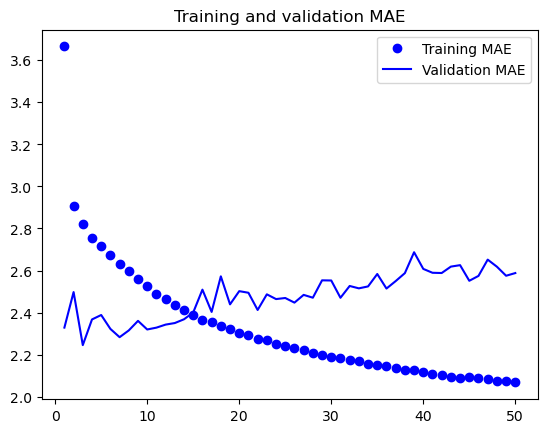

In [43]:
import matplotlib.pyplot as plt
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()